In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import visualization as _visualization
from src import metrics as _metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn import preprocessing

sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_products = pd.read_csv('../data/products_features_exp4.csv')

In [3]:
df_products = df_products.set_index('code')

In [4]:
df_products.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9,...,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,weekend_quantity_0,weekend_quantity_1,kmeans_cluster,hc_cluster
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.0,0.000000,0.0,0.02439,0.048780,0.146341,0.000000,0.000000,...,0.02439,0.268293,0.073171,0.121951,0.000000,1.000000,0.756098,0.243902,4,9
d408e1b5e841dde4e15a4cfa182e3812,5,0.013333,0.0,0.026667,0.0,0.00000,0.040000,0.040000,0.000000,0.026667,...,0.00000,0.000000,0.186667,0.160000,0.000000,1.000000,0.746667,0.253333,8,6
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.0,0.000000,0.0,0.00000,0.017045,0.051136,0.000000,0.051136,...,0.00000,0.000000,0.000000,0.005682,0.005682,0.994318,0.676136,0.323864,8,6
723f73c85e91fc31d147dfade389d4f9,0,0.034000,0.0,0.002000,0.0,0.03400,0.044000,0.078000,0.004000,0.018000,...,0.07000,0.082000,0.134000,0.074000,0.000000,1.000000,0.724000,0.276000,7,2
54209126056016c7c391c0c8fd8e6eff,0,0.013746,0.0,0.000000,0.0,0.00000,0.024055,0.079038,0.006873,0.020619,...,0.00000,0.000000,0.199313,0.226804,0.000000,1.000000,0.756014,0.243986,0,1


## Normalization


In [5]:
df_products_out  = df_products.copy()

In [6]:
cols = [c for c in df_products_out.columns if c != 'cat_code']
x = df_products_out[cols].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_products_out[cols] = x_scaled

since there is a high correlation between the weeknumbers and the month

In [7]:
df_products.describe()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9,...,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,weekend_quantity_0,weekend_quantity_1,kmeans_cluster,hc_cluster
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.992308,0.019159,0.005384,0.005253,0.001280,0.019811,0.030603,0.065706,0.006072,0.025003,...,0.064607,0.066294,0.108149,0.091779,0.018999,0.981001,0.739088,0.260912,3.776923,2.453846
std,2.390213,0.026417,0.011493,0.011027,0.009809,0.024444,0.021335,0.033946,0.007900,0.018080,...,0.070918,0.061386,0.084190,0.071986,0.123551,0.123551,0.057275,0.057275,3.276095,2.164232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.000000
25%,0.000000,0.008016,0.000000,0.000000,0.000000,0.001442,0.016736,0.042784,0.002377,0.010867,...,0.002244,0.019410,0.055390,0.046138,0.000000,0.996394,0.718095,0.241913,0.000000,1.000000
50%,0.000000,0.014589,0.000000,0.000000,0.000000,0.012135,0.028936,0.064973,0.004751,0.021672,...,0.046891,0.055629,0.106978,0.073925,0.001892,0.998108,0.739886,0.260114,4.000000,2.000000
75%,0.000000,0.021418,0.003960,0.005952,0.000000,0.026257,0.040425,0.084075,0.007169,0.037067,...,0.094100,0.095861,0.147434,0.121527,0.003606,1.000000,0.758087,0.281905,7.000000,2.000000
max,10.000000,0.228760,0.065192,0.075901,0.111111,0.136684,0.120482,0.148008,0.069284,0.093023,...,0.387755,0.337838,0.567568,0.362319,1.000000,1.000000,1.000000,0.500000,8.000000,9.000000


In [8]:
df_products_out.describe()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9,...,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,weekend_quantity_0,weekend_quantity_1,kmeans_cluster,hc_cluster
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.992308,0.083752,0.082591,0.069208,0.011517,0.144940,0.254002,0.443936,0.087643,0.268778,...,0.166619,0.196230,0.190549,0.253309,0.018999,0.981001,0.478176,0.521824,0.472115,0.181731
std,2.390213,0.115481,0.176292,0.145277,0.088281,0.178838,0.177078,0.229356,0.114019,0.194360,...,0.182893,0.181701,0.148334,0.198680,0.123551,0.123551,0.114550,0.114550,0.409512,0.270529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035042,0.000000,0.000000,0.000000,0.010553,0.138909,0.289069,0.034304,0.116822,...,0.005786,0.057453,0.097592,0.127340,0.000000,0.996394,0.436190,0.483825,0.000000,0.000000
50%,0.000000,0.063772,0.000000,0.000000,0.000000,0.088782,0.240166,0.438987,0.068579,0.232974,...,0.120929,0.164663,0.188486,0.204033,0.001892,0.998108,0.479772,0.520228,0.500000,0.125000
75%,0.000000,0.093626,0.060748,0.078424,0.000000,0.192098,0.335524,0.568046,0.103469,0.398474,...,0.242679,0.283748,0.259764,0.335414,0.003606,1.000000,0.516175,0.563810,0.875000,0.125000
max,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Using Elbow optimization with KMeans

In [9]:
df_products_out.columns

Index(['cat_code', 'source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8',
       'source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7',
       'source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9',
       'source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2',
       'source_channel_quantity_7261d300057219056592010c7bdaf5ee',
       'source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58',
       'source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002',
       'source_channel_quantity_af082bb0c2fa1414655017d464aa0262',
       'source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9',
       'month_quantity_1', 'month_quantity_2', 'month_quantity_3',
       'month_quantity_4', 'month_quantity_5', 'month_quantity_6',
       'month_quantity_7', 'month_quantity_8', 'month_quantity_9',
       'month_quantity_10', 'month_quantity_11', 'month_quantity_12',
       'perc_pis_cofins_quantity_0.0', 'perc_pis_cofins_quantity_9.25',
       'weekend_quantity_0', 'weekend_quan

In [10]:
best_K, Ks, Js = _optimizer.elbow_kmeans(df_products_out, max_k=130, step=1)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 1.7621740418580871
error = 1.7621740418580871
###############################
Number of Clusters: 3
Starting K-means++
Finished
J = 0.9943675627687301
error = 0.7678064790893571
###############################
Number of Clusters: 4
Starting K-means++
Finished
J = 0.7652581674405939
error = 0.22910939532813612
###############################
Number of Clusters: 5
Starting K-means++
Finished
J = 0.6567783168934379
error = 0.10847985054715603
###############################
Number of Clusters: 6
Starting K-means++
Finished
J = 0.617229585137163
error = 0.039548731756274935
###############################
Number of Clusters: 7
Starting K-means++
Finished
J = 0.5816947616756138
error = 0.035534823461549125
###############################
Number of Clusters: 8
Starting K-means++
Finished
J = 0.52335894706421
error = 0.0583358146114038
###############################
Number of Clusters: 9
Starting K-means++


In [11]:
cluster = KMeans(n_clusters=best_K,random_state=42)
cluster_result = cluster.fit(df_products_out)

In [12]:
len(cluster_result.labels_)

130

In [13]:
cluster_result.n_features_in_

28

In [14]:
# cluster_result.cluster_centers_

In [15]:
df_centroids = pd.DataFrame(cluster_result.cluster_centers_, columns=df_products_out.columns)
df_centroids

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9,...,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,weekend_quantity_0,weekend_quantity_1,kmeans_cluster,hc_cluster
0,5.000000e+00,0.125147,1.387779e-17,0.117111,1.734723e-18,0.000000,0.157826,0.205252,0.000000,0.416615,...,0.000000,0.037949,0.290338,0.329350,0.014714,0.985286,0.410074,0.589926,1.000000e+00,6.250000e-01
1,0.000000e+00,0.327684,2.593663e-01,0.098452,1.734723e-18,0.052913,0.233555,0.705630,0.076151,0.237694,...,0.073877,0.072574,0.157859,0.378402,0.002404,0.997596,0.493313,0.506687,5.551115e-17,2.775558e-17
2,9.750000e+00,0.013492,1.217409e-01,0.020332,2.500000e-01,0.287327,0.077113,0.286624,0.012728,0.218711,...,0.143519,0.110748,0.104986,0.206704,0.027998,0.972002,0.325586,0.674414,5.312500e-01,3.125000e-01
3,3.888889e+00,0.046467,1.042594e-01,0.089756,6.671609e-03,0.116324,0.443205,0.424655,0.145267,0.109548,...,0.267268,0.291195,0.298116,0.387232,0.002059,0.997941,0.455592,0.544408,3.750000e-01,8.750000e-01
4,9.992007e-16,0.095263,1.408207e-01,0.085251,6.635835e-03,0.284075,0.339951,0.500776,0.099565,0.213901,...,0.227617,0.225225,0.186080,0.179591,0.002282,0.997718,0.475169,0.524831,8.750000e-01,1.250000e-01
5,7.000000e+00,0.000000,0.000000e+00,0.231140,0.000000e+00,0.000000,0.291228,0.237067,0.253216,0.377193,...,0.316713,0.519298,0.000000,0.096842,0.000000,1.000000,0.473684,0.526316,7.500000e-01,7.500000e-01
6,6.000000e+00,0.083488,2.651871e-01,0.731978,0.000000e+00,0.213358,0.266027,0.852953,0.095885,0.165687,...,0.369468,0.281312,0.107699,0.247284,1.000000,0.000000,0.481153,0.518847,1.250000e-01,3.750000e-01
7,1.500000e+00,0.195832,0.000000e+00,0.268878,0.000000e+00,0.313184,0.625908,0.976972,0.000000,0.000000,...,0.531451,0.759522,0.064460,0.196456,0.000000,1.000000,0.409159,0.590841,5.000000e-01,1.000000e+00
8,8.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.232687,0.267068,0.225206,0.394286,0.000000,1.000000,0.458647,0.541353,2.500000e-01,5.000000e-01
9,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.460000,0.000000,1.000000,1.000000,0.000000,5.000000e-01,1.000000e+00


In [16]:
df_centroids.describe()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9,...,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,weekend_quantity_0,weekend_quantity_1,kmeans_cluster,hc_cluster
count,1.400000e+01,14.000000,14.000000,14.000000,1.400000e+01,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,1.400000e+01,14.000000
mean,3.652778e+00,0.077356,0.071793,0.123976,1.946879e-02,0.106986,0.216348,0.388709,0.067885,0.195289,...,0.178889,0.218456,0.145026,0.264428,0.075578,0.924422,0.531892,0.468108,4.308036e-01,0.441964
std,3.737924e+00,0.091512,0.094457,0.193847,6.642630e-02,0.120563,0.177038,0.305546,0.073484,0.156270,...,0.161341,0.216275,0.110316,0.129577,0.266181,0.266181,0.204639,0.204639,3.462927e-01,0.367280
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325586,0.000000,-2.775558e-16,0.000000
25%,7.494005e-16,0.003373,0.000000,0.021301,0.000000e+00,0.000000,0.097291,0.213205,0.000000,0.027387,...,0.023016,0.049224,0.074592,0.183807,0.000000,0.996105,0.439057,0.508287,1.562500e-01,0.125000
50%,2.694444e+00,0.060869,0.029181,0.062956,1.734723e-18,0.065998,0.202122,0.367672,0.073837,0.216306,...,0.185568,0.174634,0.136021,0.284487,0.002171,0.997829,0.474427,0.525573,4.375000e-01,0.437500
75%,6.750000e+00,0.092319,0.117371,0.112446,5.058826e-03,0.195042,0.284928,0.512683,0.098645,0.281409,...,0.258622,0.288724,0.215424,0.367618,0.003895,1.000000,0.491713,0.560943,6.953125e-01,0.718750
max,9.750000e+00,0.327684,0.265187,0.731978,2.500000e-01,0.313184,0.625908,0.976972,0.253216,0.435415,...,0.531451,0.759522,0.322948,0.460000,1.000000,1.000000,1.000000,0.674414,1.000000e+00,1.000000


In [17]:
df_products_out['kmeans_cluster'] = cluster_result.labels_

J  [1.7621740418580871, 0.9943675627687301, 0.7652581674405939, 0.6567783168934379, 0.617229585137163, 0.5816947616756138, 0.52335894706421, 0.5049452334710683, 0.4691409066759443, 0.44771722478861187, 0.4254443484303961, 0.41022807061828165, 0.40302448259935225]
Ks  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


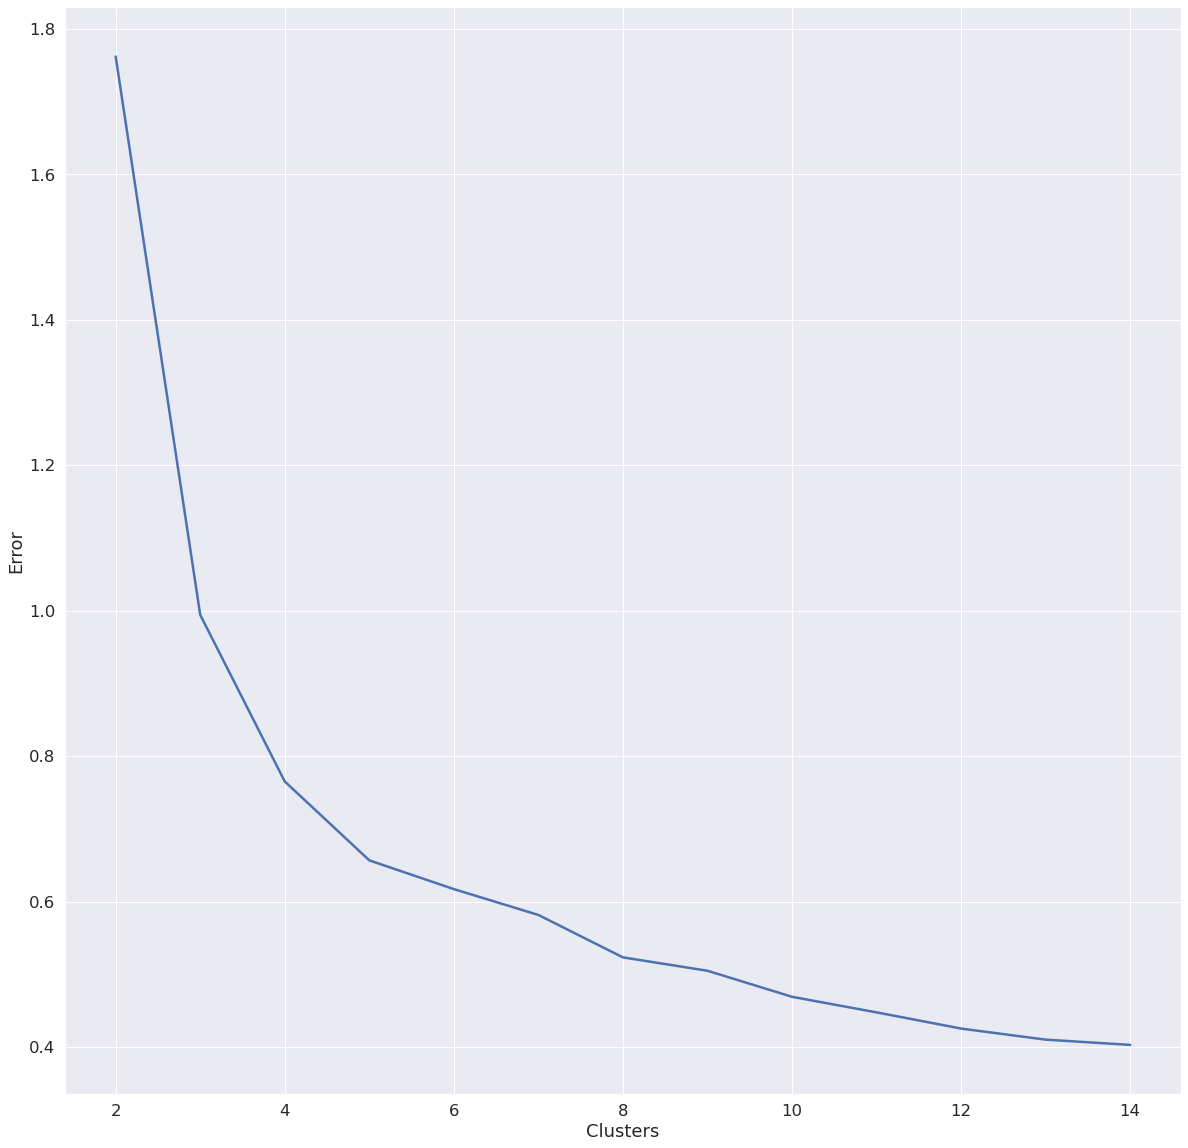

In [18]:
_ = _visualization.plot_cluster_errors(Ks,Js)

* It seems thare are too many columns, the number of clusters is almost the same of the number of samples

## Using a dendogram

We are using lastP as metric for the linkage method:

"The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes."

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

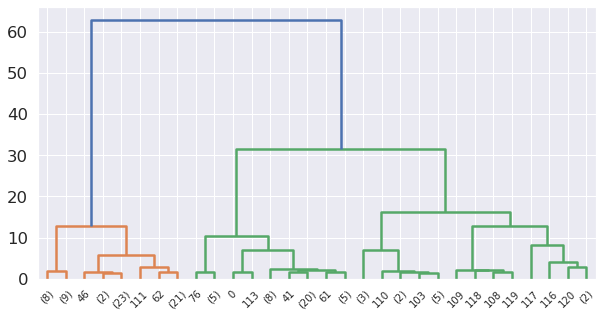

In [19]:
from importlib import reload
reload(_optimizer)
X_linked = _optimizer.linkage_cluster_dendogram(df_products_out)

In [20]:
clusters = _optimizer.fcluster_cut(df_products_out.values, max_d=2)
clusters.shape, len(np.unique(clusters))

((130,), 18)

In [21]:
df_products_out['hc_cluster'] = clusters

In [22]:
df_products_out[['kmeans_cluster', 'hc_cluster']].reset_index().groupby(['kmeans_cluster', 'hc_cluster']).count()

code
kmeans_cluster hc_cluster      
0              10             3
1              5              6
2              12             2
               13             1
               14             1
3              11             9
4              7              8
               8             21
               9              6
5              16             1
6              15             2
7              6              2
8              17             1
9              4              1
10             3             22
11             2             26
12             18             1
13             1             17

/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

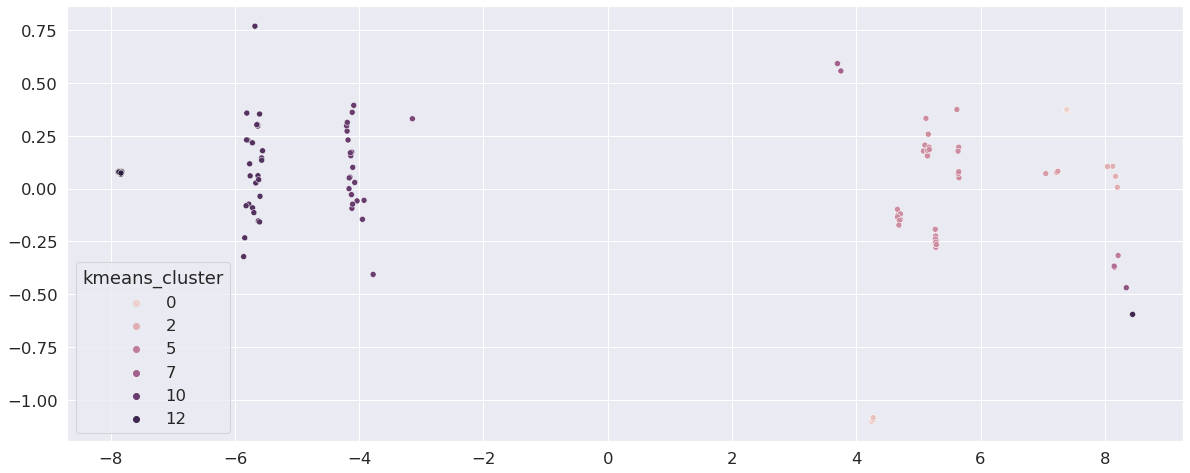

In [23]:
tsne_labels = _visualization.create_tsne_labels(df_products_out)
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['kmeans_cluster'])

/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

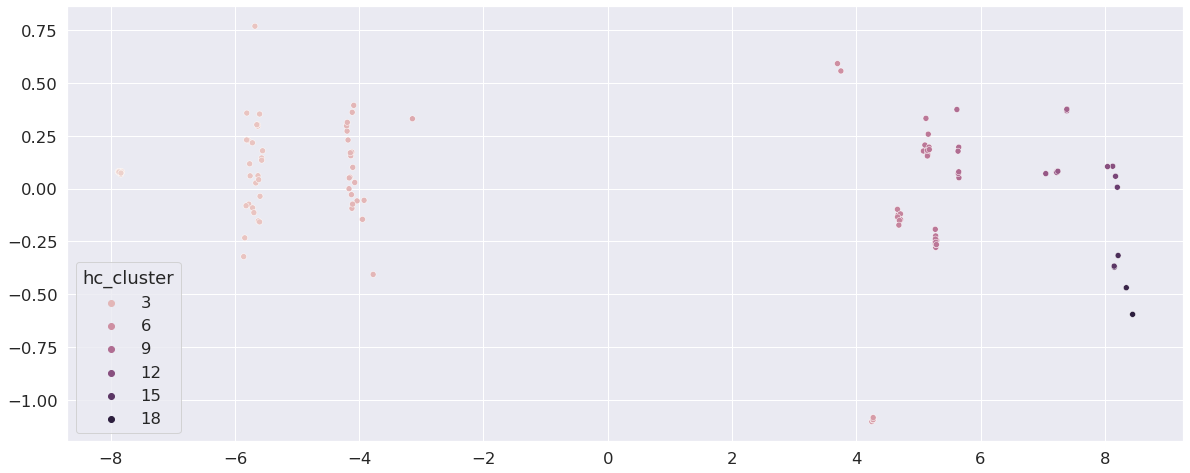

In [24]:
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['hc_cluster'])

In [25]:
_metrics.applyClusterMetrics(df_products_out,df_products_out.kmeans_cluster)

Davies Bouldin
0.3735583122789666

Calinski and Harabaz
655.8692570612976

Silhouette Score
0.6248878451078755



In [26]:
_metrics.applyClusterMetrics(df_products_out,df_products_out.hc_cluster)

Davies Bouldin
0.43426118696622135

Calinski and Harabaz
788.3786285007574

Silhouette Score
0.5397876650697793



In [27]:
df_products_out.drop(columns=['hc_cluster', 'kmeans_cluster']).to_csv('../data/products_features_exp5.csv')